This is code tuns the scaled experiment where we use m4 dataset.

#### 1-First we load safari/walrus library

In [1]:
import os, sys
sys.path.append(os.path.abspath(".."))

import matplotlib.pyplot as plt
import safari
import numpy as np
import tqdm
from tqdm import tqdm
import scipy.io as sio

#### 2- Instantiating walrus

In [2]:
Walrus_params={'fname':'wavelet',
               'meas':'scaled',
               'wavelet_name':'db11',
               'L':2**18,
               'wavelet_scale_max':2,
               'wavelet_scale_min':-3,
               'wavelet_shift':0.01
               }
safari_walrus = safari.SSM(params=Walrus_params)


L: 262144 current level l: 172033
Computing derivative of frame
wavelet scaled , diagonalizable, effective rank: 501


#### 3- building other ssm alternatives

In [3]:
# build the frames for this experiment
hippo_legs = safari.SSM(params={'N':500, 'fname':'legendre', 'meas':'scaled'})
safari_fous = safari.SSM(params={'N':500, 'fname':'fourier', 'meas':'scaled'})

Generating Legendre basis of size  500 x 5000
Computing derivative of frame
Generating HiPPO-legS
legendre , non-diagonalizable, effective rank: 500
Generating fourier basis of size  500 x 5000
fourier scaled , diagonalizable, effective rank: 501


#### 4- Loadin the M4 dataset

In [4]:
#import data
M4File=sio.loadmat('../Datasets/M4/Monthly-train_0.mat')
inputs= M4File['data']

#### 5- constructing different instances, finding ssm representation, then reconstructing the input signal

In [5]:
err_leg, err_fou, err_wave=[], [], []
for x_ind in range(300):

    signal=inputs[:,x_ind] 
    Seq_len=5000
    signal= safari.resample(signal,Seq_len)
    signal=signal/ np.linalg.norm(signal)


    #Compute the states 
    c_legs= safari.compute_ssm_state( hippo_legs, signal )
    c_fous = safari.compute_ssm_state( safari_fous, signal )
    c_walrus = safari.compute_ssm_state( safari_walrus, signal )

    #find the recunstructions for the given computed state
    xhat_legs = safari.reconstruct(c_legs[:,-1], Seq_len, hippo_legs.Fobj.D)
    xhat_fous = safari.reconstruct(c_fous[:,-1], Seq_len, safari_fous.Fobj.D)
    xhat_walrus = safari.reconstruct(c_walrus[:,-1], Seq_len, safari_walrus.Fobj.D)

    err_wave.append( np.linalg.norm(signal-xhat_walrus) )
    err_fou.append( np.linalg.norm(signal-xhat_fous) )
    err_leg.append( np.linalg.norm(signal-xhat_legs) )
    



Measuring the MSE to compare reconstruction errors

In [6]:

#collect the reconstruction errors
print("recon error for walrus:", sum(err_wave)/len(err_wave))
print("recon error for legs:", sum(err_leg)/len(err_leg))
print("recon error for fous:", sum(err_fou)/len(err_fou))

recon error for walrus: 0.042626048058509045
recon error for legs: 0.044371121048064524
recon error for fous: 0.09095875994015042


Plotting the reconstruction. We also show a zoomed in version where the differences becomre more apparent

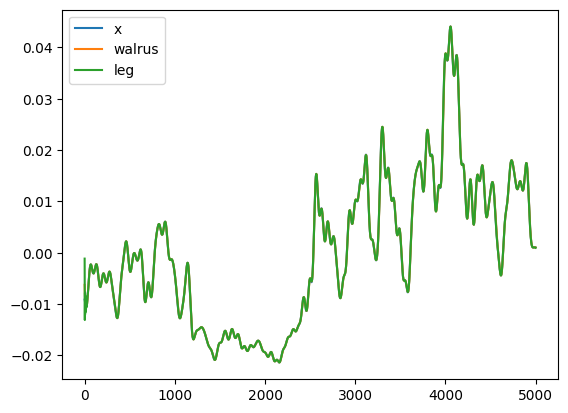

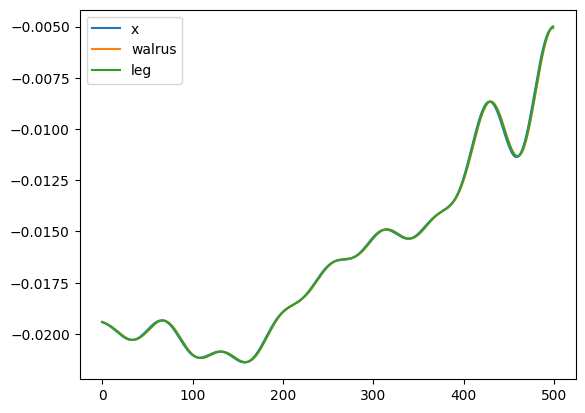

In [7]:

##This plots reconstructions for rach inout instance
plt.figure()
plt.plot(signal,label='x')
plt.plot(xhat_walrus,label='walrus')
plt.plot(xhat_legs,label='leg')
# plt.plot(xhat_fous,label='fou')  
plt.legend()
plt.show()



##This plots reconstructions for rach inout instance
plt.figure()
plt.plot(signal[2000:2500],label='x')
plt.plot(xhat_walrus[2000:2500],label='walrus')
plt.plot(xhat_legs[2000:2500],label='leg')
# plt.plot(xhat_fous[2000:2500],label='fou')  
plt.legend()
plt.show()